In [1]:
!pip install --quiet scvi-colab
import sys

from scvi_colab import install

install()

IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    !pip install --quiet scrublet

/home/dima/.local/lib/python3.10/site-packages/scvi_colab/_core.py:41: UserWarning: 
                Not currently in Google Colab environment.

                Please run with `run_outside_colab=True` to override.

                Returning with no further action.
                
  warn(


In [2]:
import sys
import warnings

import anndata
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import scvi


/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/dima/.local/lib/python3.10/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/home/dima/.local/lib/python3.10/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/home/dima/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update 

In [39]:
warnings.simplefilter(action="ignore", category=FutureWarning)


sc.set_figure_params(figsize=(4, 4))
scvi.settings.seed = 94705

%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'

Global seed set to 94705


In [40]:
adata = scvi.data.heart_cell_atlas_subsampled(save_path='data/', remove_nuisance_clusters=True)
print(adata)

INFO     File data/hca_subsampled_20k.h5ad already downloaded                                                      
AnnData object with n_obs × n_vars = 18641 × 26662
    obs: 'NRP', 'age_group', 'cell_source', 'cell_type', 'donor', 'gender', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'source', 'type', 'version', 'cell_states', 'Used'
    var: 'gene_ids-Harvard-Nuclei', 'feature_types-Harvard-Nuclei', 'gene_ids-Sanger-Nuclei', 'feature_types-Sanger-Nuclei', 'gene_ids-Sanger-Cells', 'feature_types-Sanger-Cells', 'gene_ids-Sanger-CD45', 'feature_types-Sanger-CD45', 'n_counts'
    uns: 'cell_type_colors'


In [41]:
adata.obs

,NRP,age_group,cell_source,cell_type,donor,gender,n_counts,n_genes,percent_mito,percent_ribo,region,sample,scrublet_score,source,type,version,cell_states,Used
AACTCCCCACGAGAGT-1-HCAHeart7844001,Yes,65-70,Sanger-CD45,Myeloid,D6,Male,1420.0,738,0.054930,0.064789,LA,HCAHeart7844001,0.113475,CD45+,DCD,V2,LYVE1+MØ1,Yes
ATAACGCAGAGCTGGT-1-HCAHeart7829979,No,70-75,Sanger-Nuclei,Ventricular_Cardiomyocyte,D4,Female,844.0,505,0.001185,0.001185,RV,HCAHeart7829979,0.085546,Nuclei,DCD,V2,vCM1,Yes
GTCAAGTCATGCCACG-1-HCAHeart7702879,Yes,60-65,Sanger-Nuclei,Fibroblast,D2,Male,1491.0,862,0.000000,0.005366,RA,HCAHeart7702879,0.197861,Nuclei,DCD,V2,FB2,Yes
GGTGATTCAAATGAGT-1-HCAHeart8102858,Yes,60-65,Sanger-CD45,Endothelial,D11,Female,2167.0,1115,0.064144,0.027227,LA,HCAHeart8102858,0.113475,CD45+,DCD,V3,EC10_CMC-like,Yes
AGAGAATTCTTAGCAG-1-HCAHeart8102863,Yes,60-65,Sanger-Cells,Endothelial,D11,Female,7334.0,2505,0.093537,0.040496,RA,HCAHeart8102863,0.132150,Cells,DCD,V3,EC5_art,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CGTCAGGCAAGGCTCC-1-HCAHeart7985087,No,55-60,Sanger-Nuclei,Ventricular_Cardiomyocyte,D3,Male,4478.0,2243,0.002233,0.001340,RV,HCAHeart7985087,0.185751,Nuclei,DBD,V2,vCM1,Yes
AGTCACAAGACGAGCT-1-H0035_RV,No,45-50,Harvard-Nuclei,Pericytes,H7,Female,967.0,630,0.002068,0.004137,RV,H0035_RV,0.081779,Nuclei,DBD,V3,PC1_vent,Yes
GGTGAAGGTTCCACAA-1-HCAHeart7844001,Yes,65-70,Sanger-CD45,Lymphoid,D6,Male,1599.0,619,0.041901,0.155722,LA,HCAHeart7844001,0.074830,CD45+,DCD,V2,CD4+T_tem,Yes
CAGCTAAGTACAGACG-1-HCAHeart7702876,Yes,60-65,Sanger-Nuclei,Atrial_Cardiomyocyte,D2,Male,3715.0,1523,0.000269,0.002423,LA,HCAHeart7702876,0.048649,Nuclei,DCD,V2,aCM3,Yes


In [42]:
adata.obs.donor.value_counts()

donor
D6     3009
D11    1851
D2     1714
H5     1514
D7     1386
H7     1192
H3     1180
D5     1161
D4     1144
H4     1046
H6     1027
D3      999
H2      837
D1      581
Name: count, dtype: int64

In [43]:
adata.obs.donor.cat.categories

Index(['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D11', 'H2', 'H3', 'H4', 'H5',
       'H6', 'H7'],
      dtype='object')

In [48]:
# normalizing data to avoid problem with infinity values later
adata.raw = adata.copy()
sc.pp.log1p(adata.X)
print(adata)

AnnData object with n_obs × n_vars = 18641 × 26662
    obs: 'NRP', 'age_group', 'cell_source', 'cell_type', 'donor', 'gender', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'region', 'sample', 'scrublet_score', 'source', 'type', 'version', 'cell_states', 'Used'
    var: 'gene_ids-Harvard-Nuclei', 'feature_types-Harvard-Nuclei', 'gene_ids-Sanger-Nuclei', 'feature_types-Sanger-Nuclei', 'gene_ids-Sanger-Cells', 'feature_types-Sanger-Cells', 'gene_ids-Sanger-CD45', 'feature_types-Sanger-CD45', 'n_counts'
    uns: 'cell_type_colors', 'log1p'


In [49]:
query = np.array([s in ["D11", "D2"] for s in adata.obs.donor])

adata_ref = adata[~query].copy()
adata_query = adata[query].copy()

In [50]:
#donor as a batch_key because it's data that can have batch effect but still should have simillar structure
sc.pp.highly_variable_genes(adata_ref, n_top_genes=2000, batch_key="donor", subset=True)

adata_query = adata_query[:, adata_ref.var_names].copy()

In [51]:
#validate_field(adata)
scvi.model.SCVI.setup_anndata(adata_ref, batch_key="donor")

/home/dima/.local/lib/python3.10/site-packages/scvi/data/fields/_base_field.py:64: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


In [52]:
arches_params = dict(
    use_layer_norm="both",
    use_batch_norm="none",
    encode_covariates=True,
    dropout_rate=0.2,
    n_layers=2,
)

vae_ref = scvi.model.SCVI(adata_ref, **arches_params)
vae_ref.train()

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 1/400:   0%|                                                                                                                                  | 0/400 [00:00<?, ?it/s]

/home/dima/.local/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/dima/.local/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 2/400:   0%|▏                                                                     | 1/400 [00:06<39:57,  6.01s/it, v_num=1, train_loss_step=254, train_loss_epoch=359]

/home/dima/.local/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 400/400: 100%|██████████████████████████████████████████████████████████████████| 400/400 [34:09<00:00,  4.76s/it, v_num=1, train_loss_step=166, train_loss_epoch=248]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████████████████████████████████████████████████████████████| 400/400 [34:09<00:00,  5.12s/it, v_num=1, train_loss_step=166, train_loss_epoch=248]


In [53]:
adata_ref.obsm["X_scVI"] = vae_ref.get_latent_representation()
sc.pp.neighbors(adata_ref, use_rep="X_scVI")
sc.tl.leiden(adata_ref)
sc.tl.umap(adata_ref)

/home/dima/.local/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/dima/.local/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/dima/.local/lib/python3.10/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nop

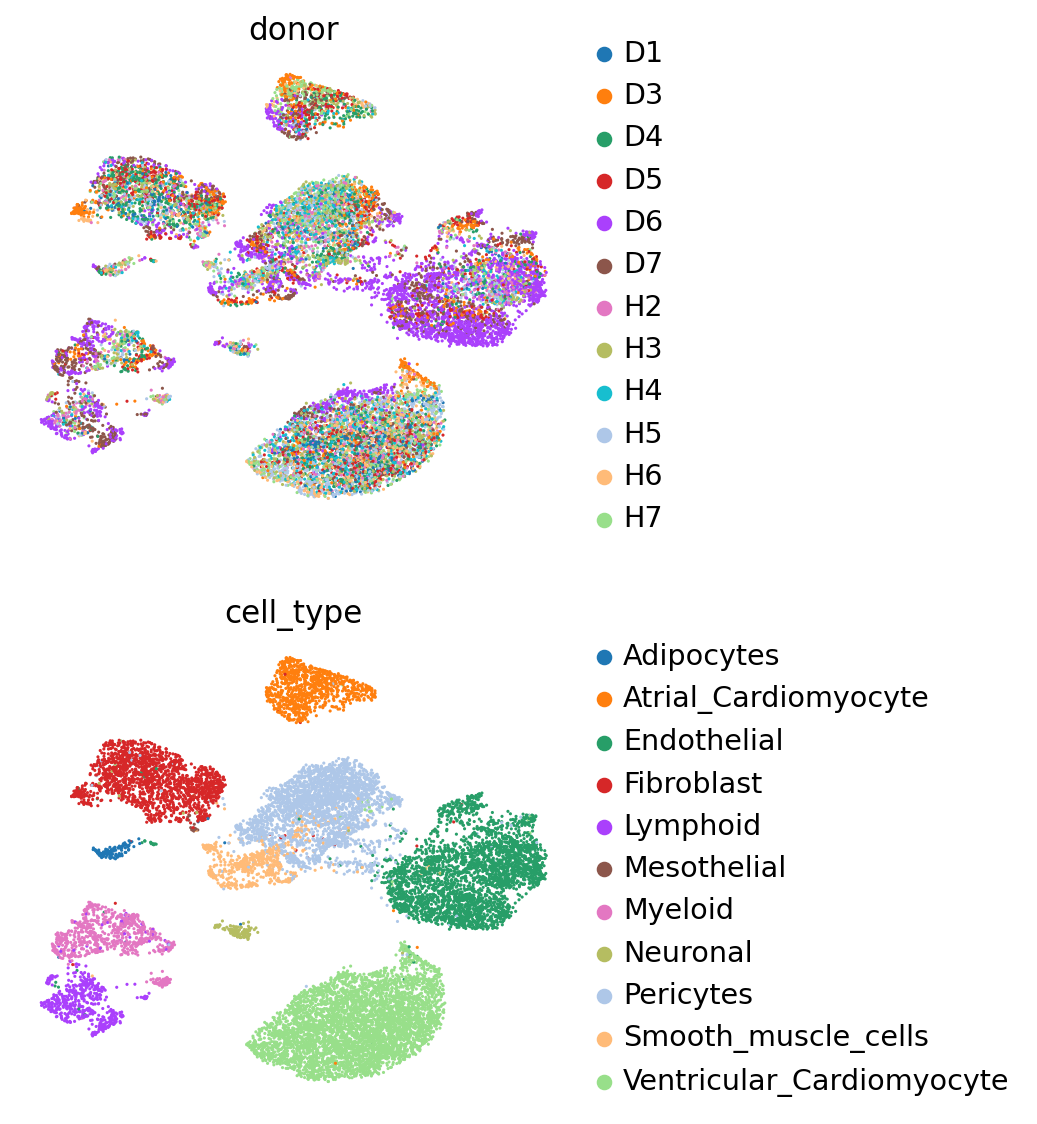

In [55]:
sc.pl.umap(
    adata_ref,
    color=["donor", "cell_type"],
    frameon=False,
    ncols=1,
)

We see reference data umap that shows us that cells from different donors have simillar distribution across umap

In [56]:
# save the reference model
dir_path = "heart_model/"
vae_ref.save(dir_path, overwrite=True)

In [57]:
scvi.model.SCVI.prepare_query_anndata(adata_query, vae_ref)

INFO     Found 100.0% reference vars in query data.                                                                


In [58]:
vae_q = scvi.model.SCVI.load_query_data(
    adata_query,
    vae_ref,
)

/home/dima/.local/lib/python3.10/site-packages/scvi/data/fields/_base_field.py:64: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


In [59]:
vae_q.train(max_epochs=200, plan_kwargs=dict(weight_decay=0.0))
adata_query.obsm["X_scVI"] = vae_q.get_latent_representation()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 1/200:   0%|                                                                                                                                            | 0/200 [00:00<?, ?it/s]

/home/dima/.local/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/dima/.local/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 2/200:   0%|▍                                                                               | 1/200 [00:01<05:38,  1.70s/it, v_num=1, train_loss_step=329, train_loss_epoch=277]

/home/dima/.local/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 200/200: 100%|████████████████████████████████████████████████████████████████████████████| 200/200 [03:48<00:00,  1.35s/it, v_num=1, train_loss_step=268, train_loss_epoch=270]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|████████████████████████████████████████████████████████████████████████████| 200/200 [03:48<00:00,  1.14s/it, v_num=1, train_loss_step=268, train_loss_epoch=270]


In [60]:
sc.pp.neighbors(adata_query, use_rep="X_scVI")
sc.tl.leiden(adata_query)
sc.tl.umap(adata_query)

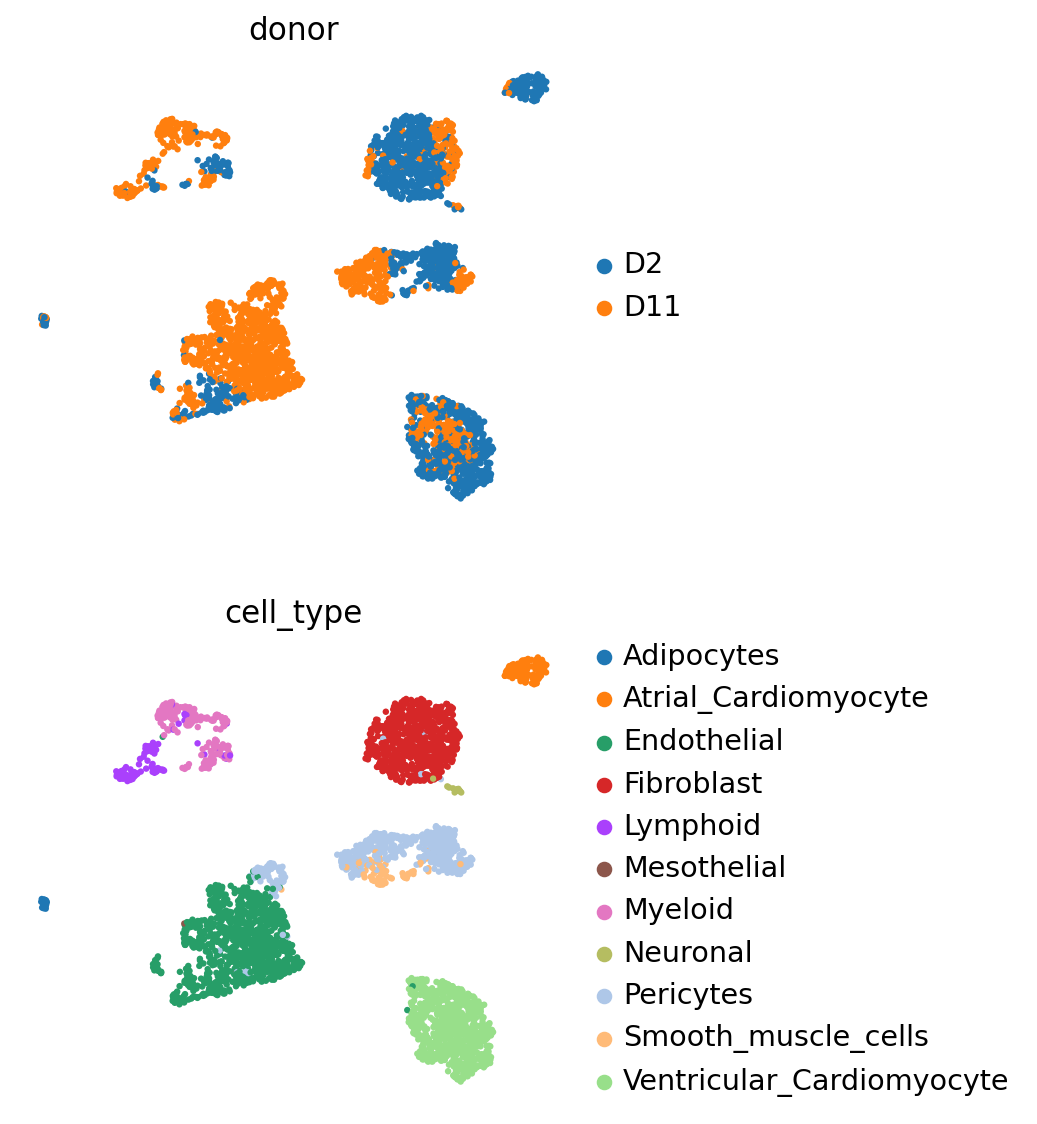

In [61]:
sc.pl.umap(
    adata_query,
    color=["donor", "cell_type"],
    frameon=False,
    ncols=1,
)

In [62]:
adata_full = adata_query.concatenate(adata_ref)

In [63]:
adata_full.obsm["X_scVI"] = vae_q.get_latent_representation(adata_full)

INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/home/dima/.local/lib/python3.10/site-packages/scvi/data/fields/_base_field.py:64: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


In [64]:
sc.pp.neighbors(adata_full, use_rep="X_scVI")
sc.tl.leiden(adata_full)
sc.tl.umap(adata_full)

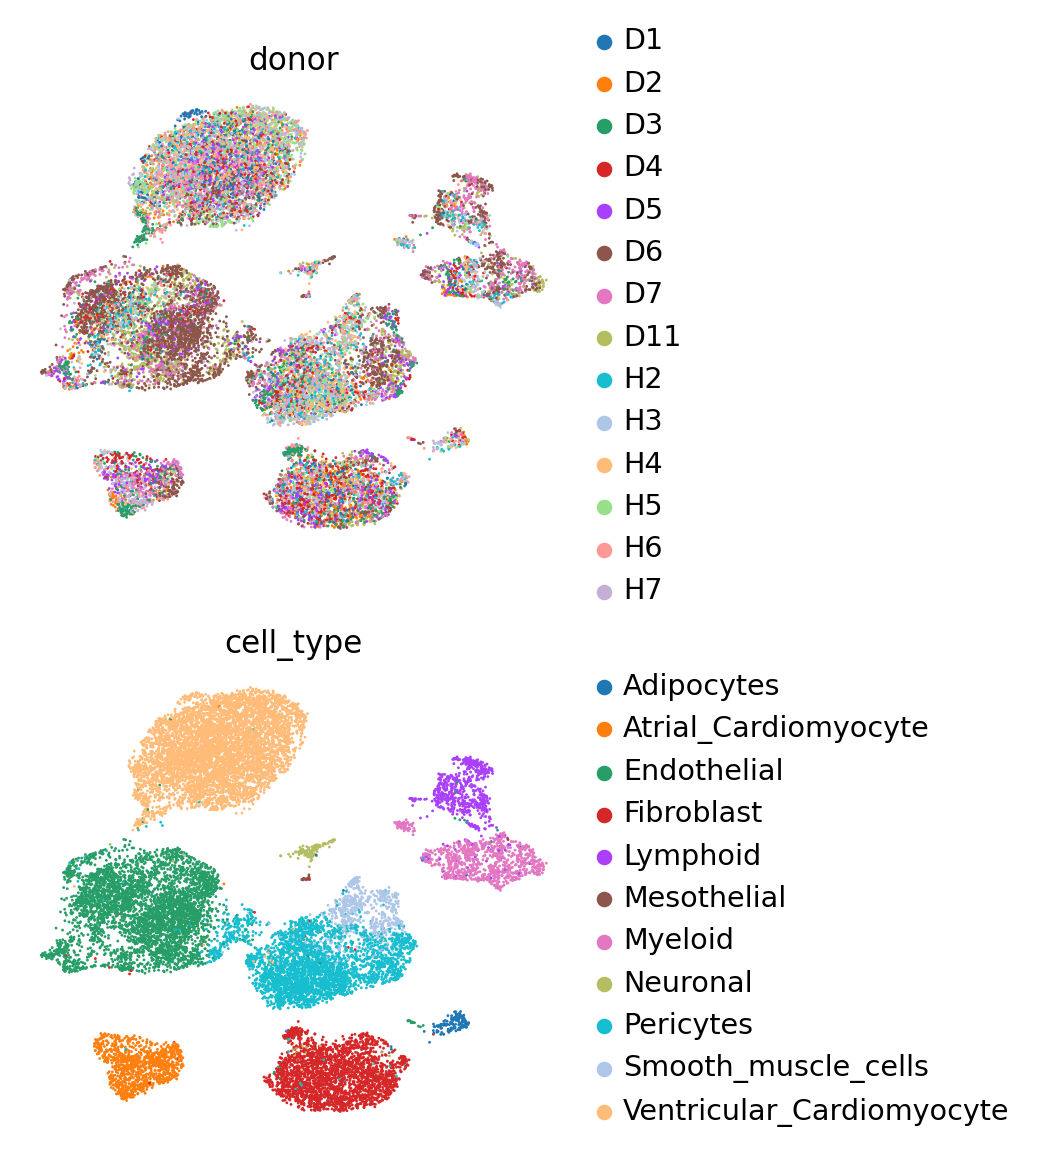

In [66]:
sc.pl.umap(
    adata_full,
    color=["donor", "cell_type"],
    frameon=False,
    ncols=1,
)

Here we see that query data lays "well" with reference data. After mapping query data on reference trained on VAE there is no big batch effect visible on the umap

# Making predictions on query data

In [69]:
adata_ref.obs["labels_scanvi"] = adata_ref.obs["cell_type"].values

In [70]:
# unlabeled category does not exist in adata.obs[labels_key]
# so all cells are treated as labeled
vae_ref_scan = scvi.model.SCANVI.from_scvi_model(
    vae_ref,
    unlabeled_category="Unknown",
    labels_key="labels_scanvi",
)

/home/dima/.local/lib/python3.10/site-packages/scvi/data/fields/_base_field.py:64: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


In [71]:
vae_ref_scan.train(max_epochs=20, n_samples_per_label=100)

INFO     Training for 20 epochs.                                                                                   


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 1/20:   0%|                                                                                                                                              | 0/20 [00:00<?, ?it/s]

/home/dima/.local/lib/python3.10/site-packages/scvi/module/_scanvae.py:286: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
/home/dima/.local/lib/python3.10/site-packages/scvi/module/_scanvae.py:286: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 2/20:   5%|████                                                                              | 1/20 [00:11<03:42, 11.69s/it, v_num=1, train_loss_step=229, train_loss_epoch=336]

/home/dima/.local/lib/python3.10/site-packages/scvi/module/_scanvae.py:286: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 20/20: 100%|████████████████████████████████████████████████████████████████████████████████| 20/20 [03:06<00:00,  9.33s/it, v_num=1, train_loss_step=197, train_loss_epoch=314]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 20/20: 100%|████████████████████████████████████████████████████████████████████████████████| 20/20 [03:06<00:00,  9.32s/it, v_num=1, train_loss_step=197, train_loss_epoch=314]


In [72]:
adata_ref.obsm["X_scANVI"] = vae_ref_scan.get_latent_representation()
sc.pp.neighbors(adata_ref, use_rep="X_scANVI")
sc.tl.leiden(adata_ref)
sc.tl.umap(adata_ref)

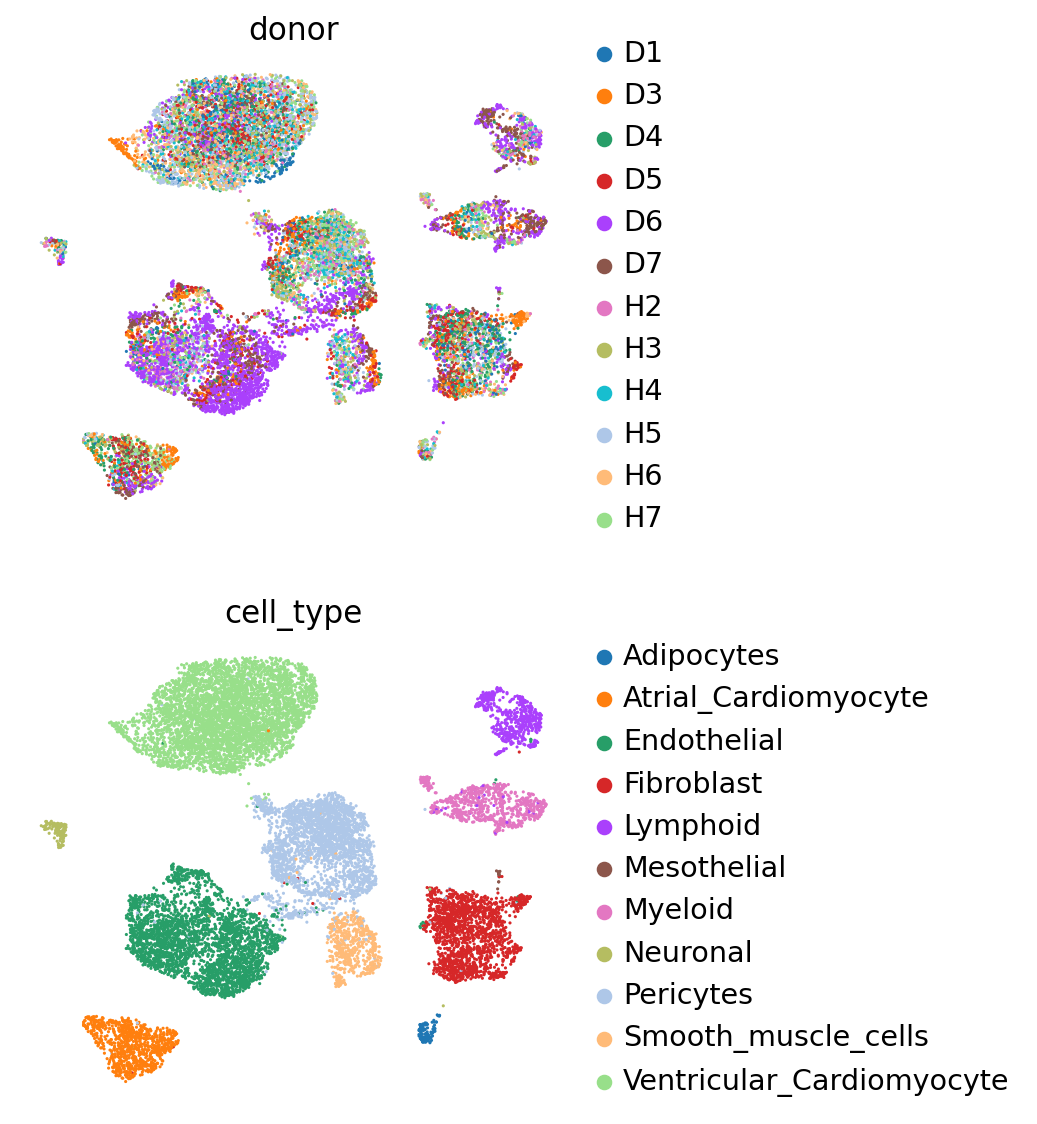

In [74]:
sc.pl.umap(
    adata_ref,
    color=["donor", "cell_type"],
    frameon=False,
    ncols=1,
)

In [75]:
dir_path_scan = "heart_model_scanvi/"
vae_ref_scan.save(dir_path_scan, overwrite=True)

In [76]:
scvi.model.SCANVI.prepare_query_anndata(adata_query, dir_path_scan)

INFO     File heart_model_scanvi/model.pt already downloaded                                                       
INFO     Found 100.0% reference vars in query data.                                                                


In [77]:
vae_q = scvi.model.SCANVI.load_query_data(
    adata_query,
    dir_path_scan,
)

INFO     File heart_model_scanvi/model.pt already downloaded                                                       


/home/dima/.local/lib/python3.10/site-packages/scvi/data/fields/_base_field.py:64: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
/home/dima/.local/lib/python3.10/site-packages/scvi/data/_manager.py:212: UserWarning: Missing labels key labels_scanvi. Filling in with unlabeled category Unknown.
  field_registry[_constants._STATE_REGISTRY_KEY] = field.transfer_field(


In [78]:
vae_q.train(
    max_epochs=100,
    plan_kwargs=dict(weight_decay=0.0),
    check_val_every_n_epoch=10,
)

INFO     Training for 100 epochs.                                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 1/100:   0%|                                                                                                                                            | 0/100 [00:00<?, ?it/s]

/home/dima/.local/lib/python3.10/site-packages/scvi/module/_scanvae.py:286: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
/home/dima/.local/lib/python3.10/site-packages/scvi/module/_scanvae.py:286: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 2/100:   1%|▊                                                                               | 1/100 [00:02<04:26,  2.70s/it, v_num=1, train_loss_step=353, train_loss_epoch=272]

/home/dima/.local/lib/python3.10/site-packages/scvi/module/_scanvae.py:286: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 11/100:  10%|███████▊                                                                      | 10/100 [00:18<02:40,  1.78s/it, v_num=1, train_loss_step=236, train_loss_epoch=265]

/home/dima/.local/lib/python3.10/site-packages/scvi/module/_scanvae.py:286: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 100/100: 100%|████████████████████████████████████████████████████████████████████████████| 100/100 [02:43<00:00,  1.30s/it, v_num=1, train_loss_step=262, train_loss_epoch=268]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|████████████████████████████████████████████████████████████████████████████| 100/100 [02:43<00:00,  1.64s/it, v_num=1, train_loss_step=262, train_loss_epoch=268]


In [79]:
adata_query.obsm["X_scANVI"] = vae_q.get_latent_representation()
adata_query.obs["predictions"] = vae_q.predict()

/tmp/ipykernel_8484/2753025153.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  _ = plt.pcolor(norm_df)


Text(0, 0.5, 'Observed')

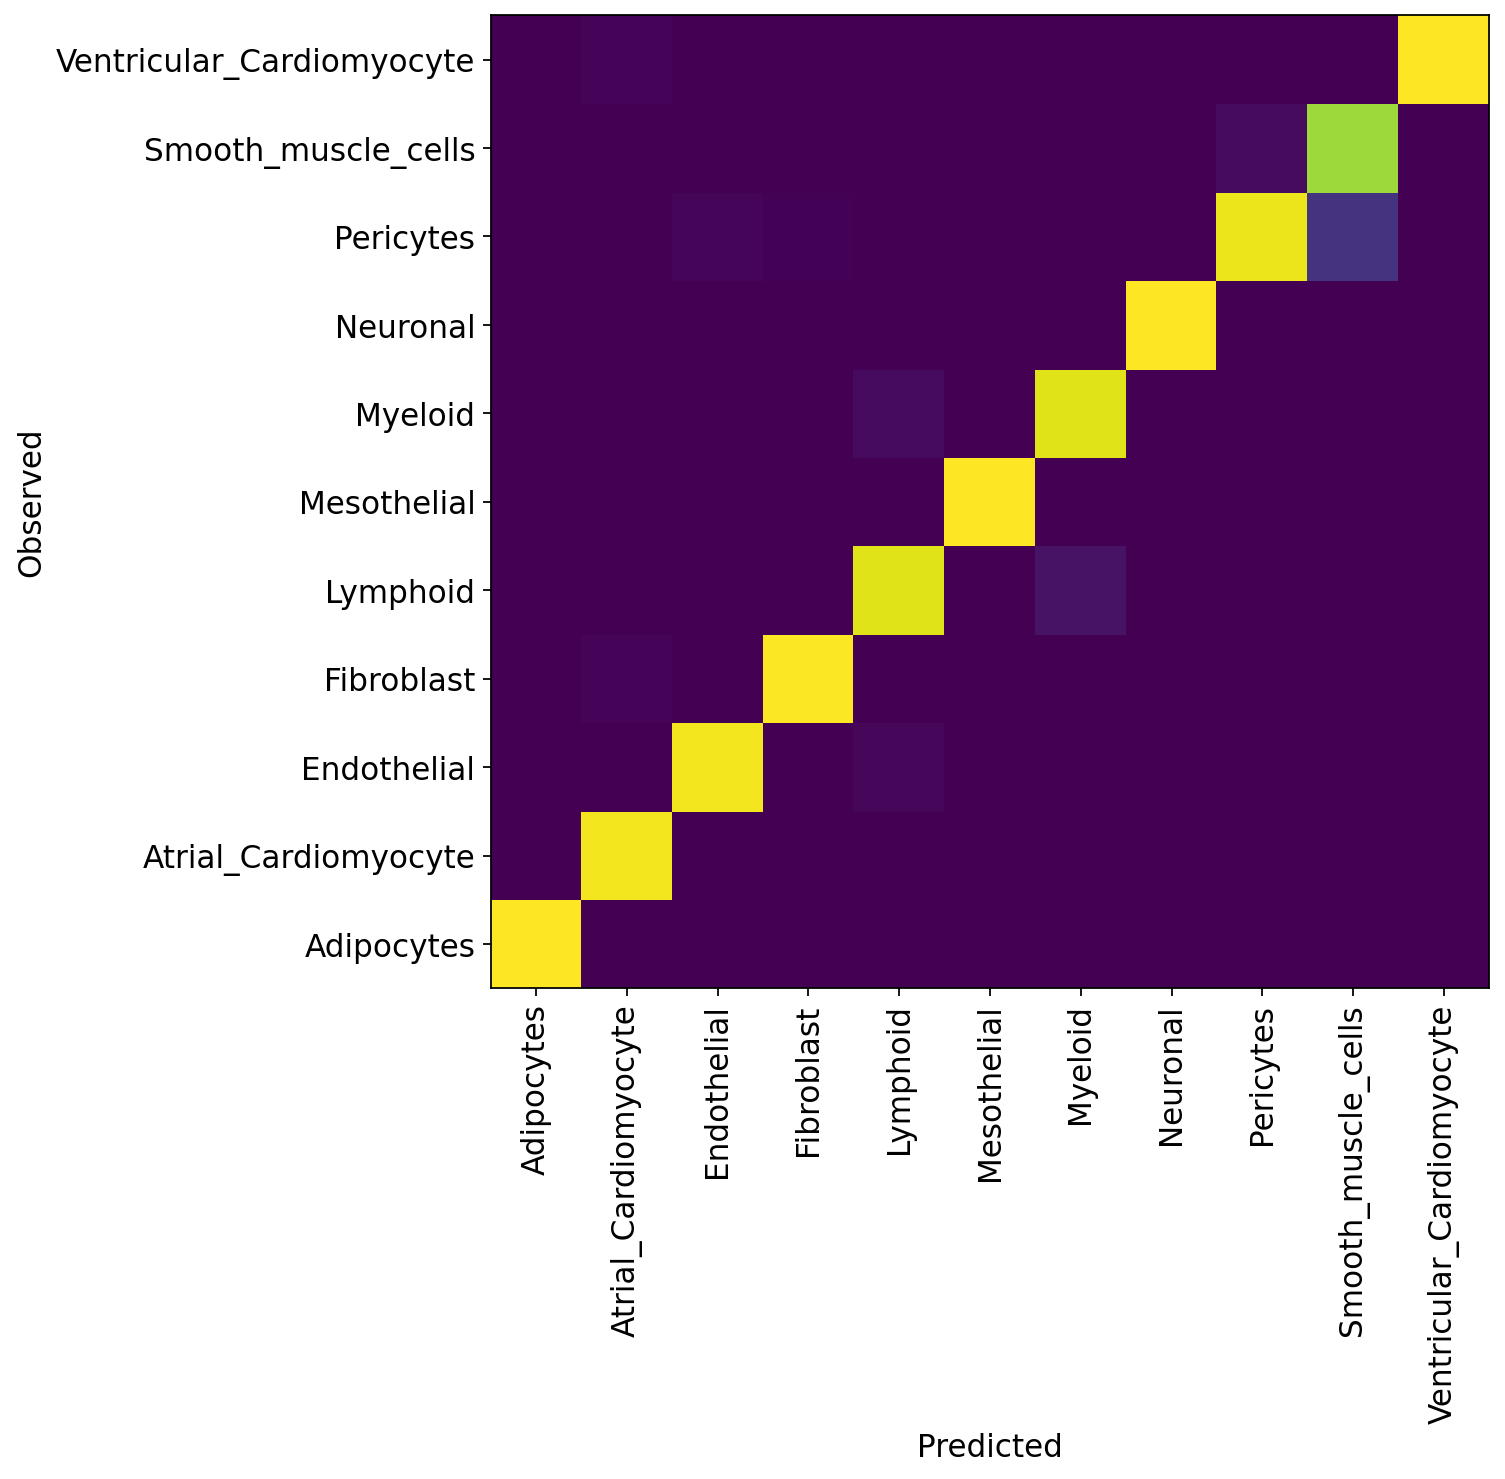

In [81]:
df = adata_query.obs.groupby(["cell_type", "predictions"]).size().unstack(fill_value=0)
norm_df = df / df.sum(axis=0)

plt.figure(figsize=(8, 8))
_ = plt.pcolor(norm_df)
_ = plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, rotation=90)
_ = plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xlabel("Predicted")
plt.ylabel("Observed")

Above we can see that most cell types are predicted well, but sometimes they can be predicted wrong as we can see for Pericytes that are predicted sometimes as smooth muscle cells

In [82]:
adata_full = adata_query.concatenate(adata_ref)

In [84]:
adata_full.obs.batch.cat.rename_categories(["Query", "Reference"])

GTCAAGTCATGCCACG-1-HCAHeart7702879-0        Query
GGTGATTCAAATGAGT-1-HCAHeart8102858-0        Query
AGAGAATTCTTAGCAG-1-HCAHeart8102863-0        Query
AGCGCTGAGGCTTAGG-1-HCAHeart8287128-0        Query
GAGTCATTCTCCGTGT-1-HCAHeart8287128-0        Query
                                          ...    
AATCGGTCAGCCTATA-1-HCAHeart7880862-1    Reference
CGTCAGGCAAGGCTCC-1-HCAHeart7985087-1    Reference
AGTCACAAGACGAGCT-1-H0035_RV-1           Reference
GGTGAAGGTTCCACAA-1-HCAHeart7844001-1    Reference
GATCGTATCAGGTTCA-1-HCAHeart7833852-1    Reference
Name: batch, Length: 18641, dtype: category
Categories (2, object): ['Query', 'Reference']

In [86]:
full_predictions = vae_q.predict(adata_full)
print(f"Acc: {np.mean(full_predictions == adata_full.obs.cell_type)}")

adata_full.obs["predictions"] = full_predictions

Acc: 0.9879298320905531


In [87]:
sc.pp.neighbors(adata_full, use_rep="X_scANVI")
sc.tl.leiden(adata_full)
sc.tl.umap(adata_full)

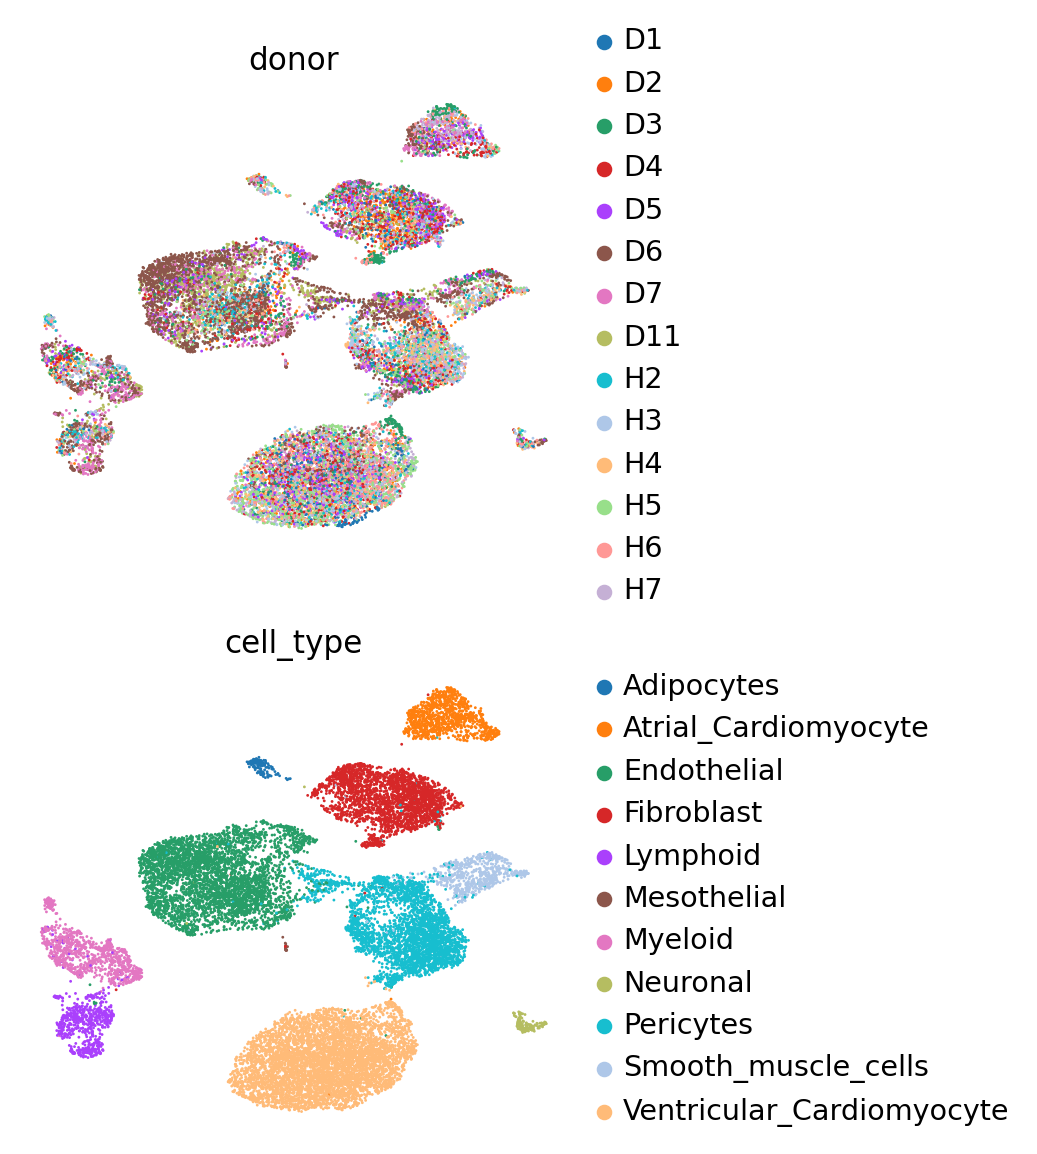

In [89]:
sc.pl.umap(
    adata_full,
    color=["donor", "cell_type"],
    frameon=False,
    ncols=1,
)

/home/dima/.local/lib/python3.10/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list


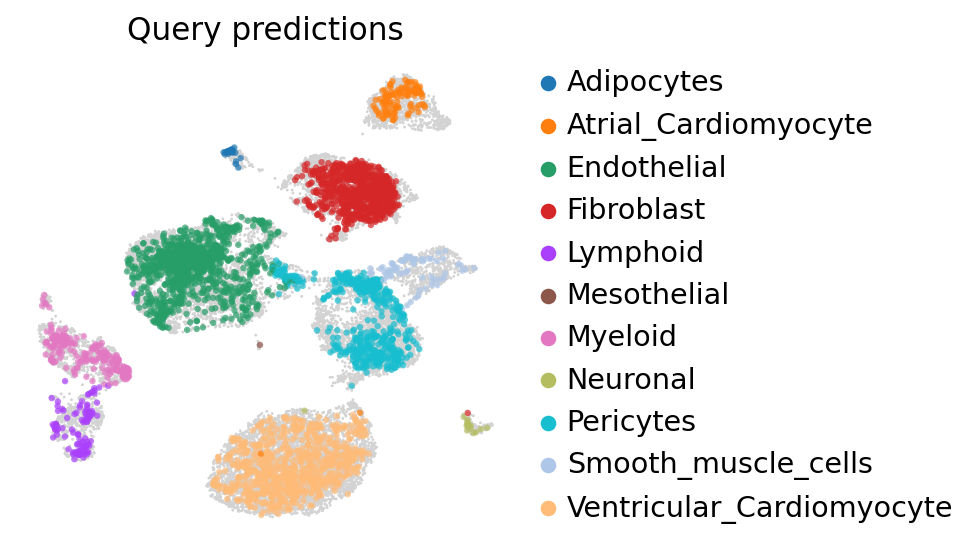

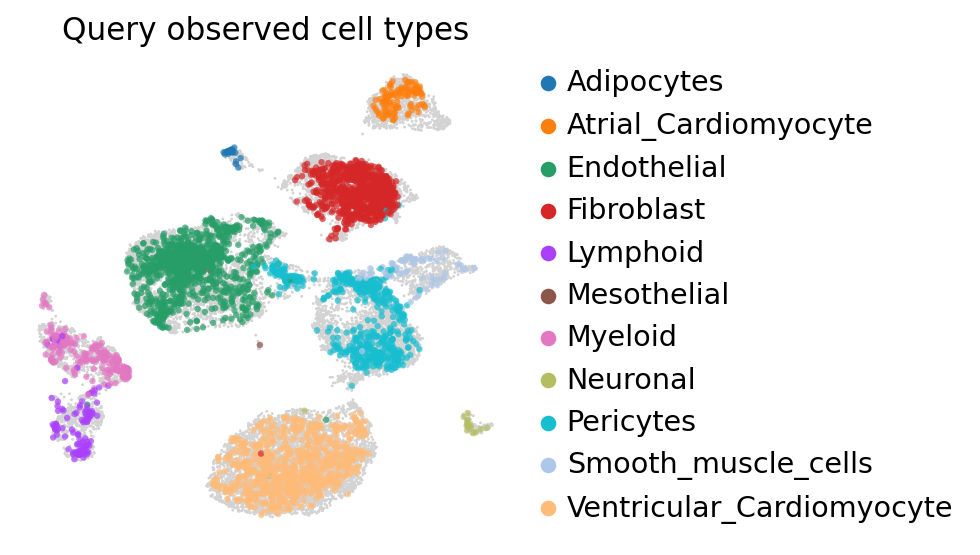

In [90]:
ax = sc.pl.umap(
    adata_full,
    frameon=False,
    show=False,
)
sc.pl.umap(
    adata_full[: adata_query.n_obs],
    color=["predictions"],
    frameon=False,
    title="Query predictions",
    ax=ax,
    alpha=0.7,
)

ax = sc.pl.umap(
    adata_full,
    frameon=False,
    show=False,
)
sc.pl.umap(
    adata_full[: adata_query.n_obs],
    color=["cell_type"],
    frameon=False,
    title="Query observed cell types",
    ax=ax,
    alpha=0.7,
)

Most predictions "laying" on right types